In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

# Gini (tessi190) values from Eurostat sheet (2014--2024)
years = list(range(2014, 2025))

data = {
    "European Union": [30.9, 30.8, 30.6, 30.3, 30.4, 30.2, 30.0, 30.2, 29.6, 29.6, 29.4],
    "Austria":        [27.0, 27.6, 27.8, 27.1, 26.8, 27.1, 26.2, 26.2, 27.0, 28.1, 26.4],
    "Belgium":        [25.9, 26.2, 26.3, 26.1, 25.7, 25.1, 25.4, 24.1, 24.9, 24.2, 24.7],
    "Bulgaria":       [35.4, 37.0, 37.7, 40.2, 39.6, 40.8, 40.0, 39.7, 38.4, 37.2, 38.4],
    "Croatia":        [30.6, 30.4, 29.6, 29.0, 29.0, 29.7, 29.1, 29.4, 29.9, 30.2, 31.3],
    "Cyprus":         [34.8, 33.6, 31.0, 29.1, 29.1, 30.1, 29.3, 29.7, 29.8, 30.7, 31.1],
    "Czechia":        [25.1, 25.0, 25.1, 24.5, 24.0, 24.0, 24.2, 24.8, 24.8, 24.4, 23.7],
    "Denmark":        [27.7, 27.4, 27.7, 27.6, 27.8, 27.5, 27.3, 27.0, 27.7, 28.2, 28.6],
    "Estonia":        [35.6, 34.8, 32.7, 31.6, 30.6, 30.5, 30.5, 30.6, 31.9, 31.8, 30.8],
    "Finland":        [25.6, 25.6, 25.3, 25.3, 25.0, 25.5, 25.4, 25.2, 24.8, 24.0, 24.8],
    "France":         [29.2, 29.2, 29.3, 28.8, 28.5, 29.2, 29.2, 29.3, 29.8, 29.7, 30.0],
    "Germany":        [30.7, 30.1, 29.5, 29.1, 31.1, 29.7, 30.5, 31.2, 29.0, 29.4, 29.5],
    "Greece":         [34.5, 34.2, 34.3, 33.4, 32.3, 31.0, 31.4, 32.4, 31.4, 31.8, 31.8],
    "Hungary":        [28.6, 28.2, 28.0, 28.7, 28.7, 28.7, 28.7, 28.7, 28.0, 28.3, 28.8],
    "Ireland":        [31.0, 29.7, 29.6, 30.6, 28.9, 28.0, 27.6, 26.6, 26.9, 27.4, 26.4],
    "Italy":          [32.4, 32.4, 32.9, 33.4, 33.4, 33.5, 31.7, 32.1, 31.9, 32.3, 32.0],
    "Latvia":         [35.7, 34.5, 34.5, 34.3, 35.6, 35.1, 35.1, 34.5, 34.3, 33.5, 34.0],
    "Lithuania":      [37.9, 37.3, 37.0, 37.6, 35.4, 35.1, 35.1, 35.9, 36.6, 33.9, 34.6],
    "Luxembourg":     [30.9, 32.0, 31.0, 30.9, 31.2, 32.5, 32.1, 33.3, 31.7, 32.5, 31.7],
    "Malta":          [28.0, 27.7, 27.1, 26.0, 28.1, 28.7, 28.0, 28.0, 28.6, 30.7, 28.7],
    "Netherlands":    [25.1, 25.4, 26.2, 26.6, 26.7, 28.0, 28.5, 29.1, 29.5, 27.9, 29.1],
    "Poland":         [31.8, 30.6, 30.2, 29.2, 28.5, 28.5, 26.9, 27.3, 27.7, 26.9, 26.4],
    "Portugal":       [34.0, 34.0, 33.5, 33.5, 32.0, 31.2, 31.2, 30.8, 32.0, 29.8, 30.0],
    "Romania":        [35.0, 37.4, 34.7, 33.1, 34.8, 34.6, 34.3, 35.1, 34.9, 33.1, 34.2],
    "Slovakia":       [26.1, 25.2, 25.3, 23.2, 23.2, 20.9, 20.6, 20.6, 20.6, 21.2, 21.3],
    "Slovenia":       [24.0, 24.5, 24.5, 23.7, 23.4, 23.4, 23.8, 23.1, 23.4, 23.0, 23.7],
    "Spain":          [34.7, 34.6, 34.5, 34.1, 33.2, 33.0, 32.1, 33.0, 32.0, 31.5, 31.2],
    "Sweden":         [26.9, 26.7, 27.6, 28.0, 27.0, 27.6, 26.9, 26.8, 27.6, 29.5, 27.6],
}

def build_dataframes(data: dict) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Build wide and long DataFrames from the hardcoded dictionary.
    """
    df_wide = pd.DataFrame(
        [(k, *v) for k, v in data.items()],
        columns=["GEO"] + years,
    )
    df_long = df_wide.melt(id_vars="GEO", var_name="year", value_name="gini")
    df_long = df_long.dropna(subset=["gini"]).sort_values(["GEO", "year"])
    return df_wide, df_long

def plot_all(df_long: pd.DataFrame, legend_outside: bool = True, order: list[str] | None = None):
    """
    Plot all series. If 'order' is provided, plot in that order so the legend
    will also reflect the same ordering.
    """
    if order is None:
        geos = sorted(df_long["GEO"].unique())
    else:
        geos = order

    plt.figure(figsize=(13.5, 7))
    for geo in geos:
        grp = df_long[df_long["GEO"] == geo].sort_values("year")
        plt.plot(grp["year"], grp["gini"], linewidth=1, alpha=0.8, label=geo)

    plt.title("Gini coefficient of equivalised disposable income (tessi190)")
    plt.xlabel("Year")
    plt.ylabel("Gini coefficient")
    plt.grid(True, alpha=0.3)

    if legend_outside:
        plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), borderaxespad=0.0, frameon=False)
        plt.tight_layout(rect=[0, 0, 0.8, 1])
    else:
        plt.legend(ncol=2, fontsize=8)
        plt.tight_layout()

    plt.show()

def latest_values(df_long: pd.DataFrame) -> pd.DataFrame:
    """
    Return a DataFrame with the most recent (non-NaN) Gini for each GEO.
    Columns: GEO | latest_year | latest_gini
    """
    # For each GEO, find the latest year with a value.
    latest = (
        df_long.dropna(subset=["gini"])
        .sort_values(["GEO", "year"])
        .groupby("GEO")
        .tail(1)
        .rename(columns={"year": "latest_year", "gini": "latest_gini"})
        [["GEO", "latest_year", "latest_gini"]]
    )
    return latest.sort_values(["latest_gini", "GEO"], ascending=[True, True]).reset_index(drop=True)

def plot_ranked_by_latest(df_long: pd.DataFrame, include_eu_aggregate: bool = True):
    """
    Compute ranking by most recent Gini (ascending) and plot in that order.
    The legend will follow the same order.
    """
    latest = latest_values(df_long)

    if not include_eu_aggregate:
        mask = ~latest["GEO"].str.startswith("European Union")
        latest = latest[mask]

    # Order for plotting
    order = latest["GEO"].tolist()

    print("Ranking by most recent Gini (lowest first):")
    print(latest.to_string(index=False))

    plot_all(df_long, legend_outside=True, order=order)

def plot_ranked_with_end_labels(df_long: pd.DataFrame, include_eu_aggregate: bool = True):
    """
    Plot all countries ranked by latest Gini, but instead of a legend, place
    a small text label with an arrow at the end of each line.
    """
    latest = latest_values(df_long)
    if not include_eu_aggregate:
        latest = latest[~latest["GEO"].str.startswith("European Union")]

    order = latest["GEO"].tolist()

    plt.figure(figsize=(13.5, 35))
    for geo in order:
        grp = df_long[df_long["GEO"] == geo].sort_values("year")
        plt.plot(grp["year"], grp["gini"], linewidth=1, alpha=0.8)

        # Get last point for label
        x_end = grp["year"].iloc[-1]
        y_end = grp["gini"].iloc[-1]
        plt.annotate(
            geo,
            xy=(x_end, y_end),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            fontsize=8,
            arrowprops=dict(arrowstyle="-", lw=0.5, color="gray")
        )

    plt.title("Gini coefficient of equivalised disposable income (tessi190)")
    plt.xlabel("Year")
    plt.ylabel("Gini coefficient")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

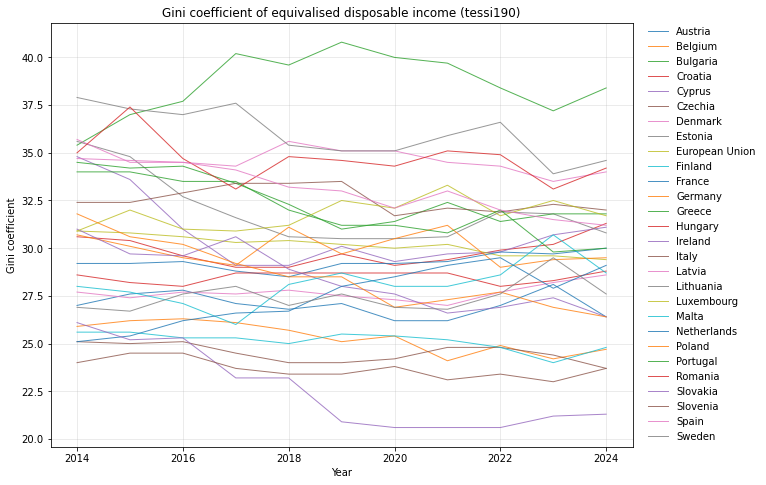

Ranking by most recent Gini (lowest first):
           GEO latest_year  latest_gini
      Slovakia        2024         21.3
       Czechia        2024         23.7
      Slovenia        2024         23.7
       Belgium        2024         24.7
       Finland        2024         24.8
       Austria        2024         26.4
       Ireland        2024         26.4
        Poland        2024         26.4
        Sweden        2024         27.6
       Denmark        2024         28.6
         Malta        2024         28.7
       Hungary        2024         28.8
   Netherlands        2024         29.1
European Union        2024         29.4
       Germany        2024         29.5
        France        2024         30.0
      Portugal        2024         30.0
       Estonia        2024         30.8
        Cyprus        2024         31.1
         Spain        2024         31.2
       Croatia        2024         31.3
    Luxembourg        2024         31.7
        Greece        2024         3

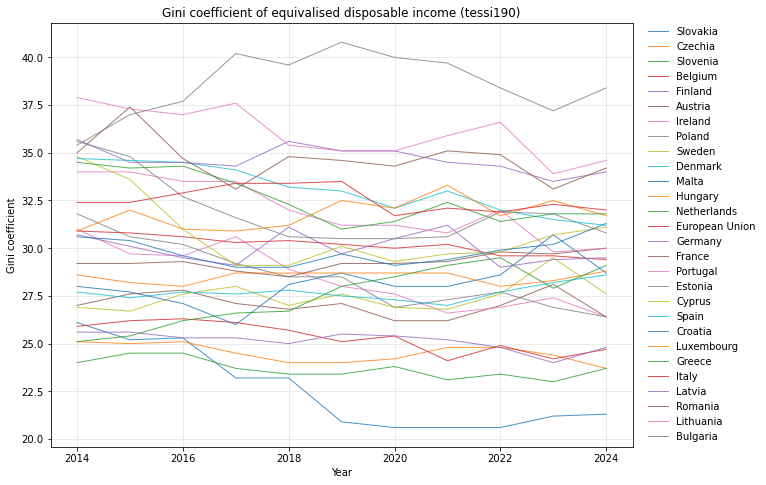

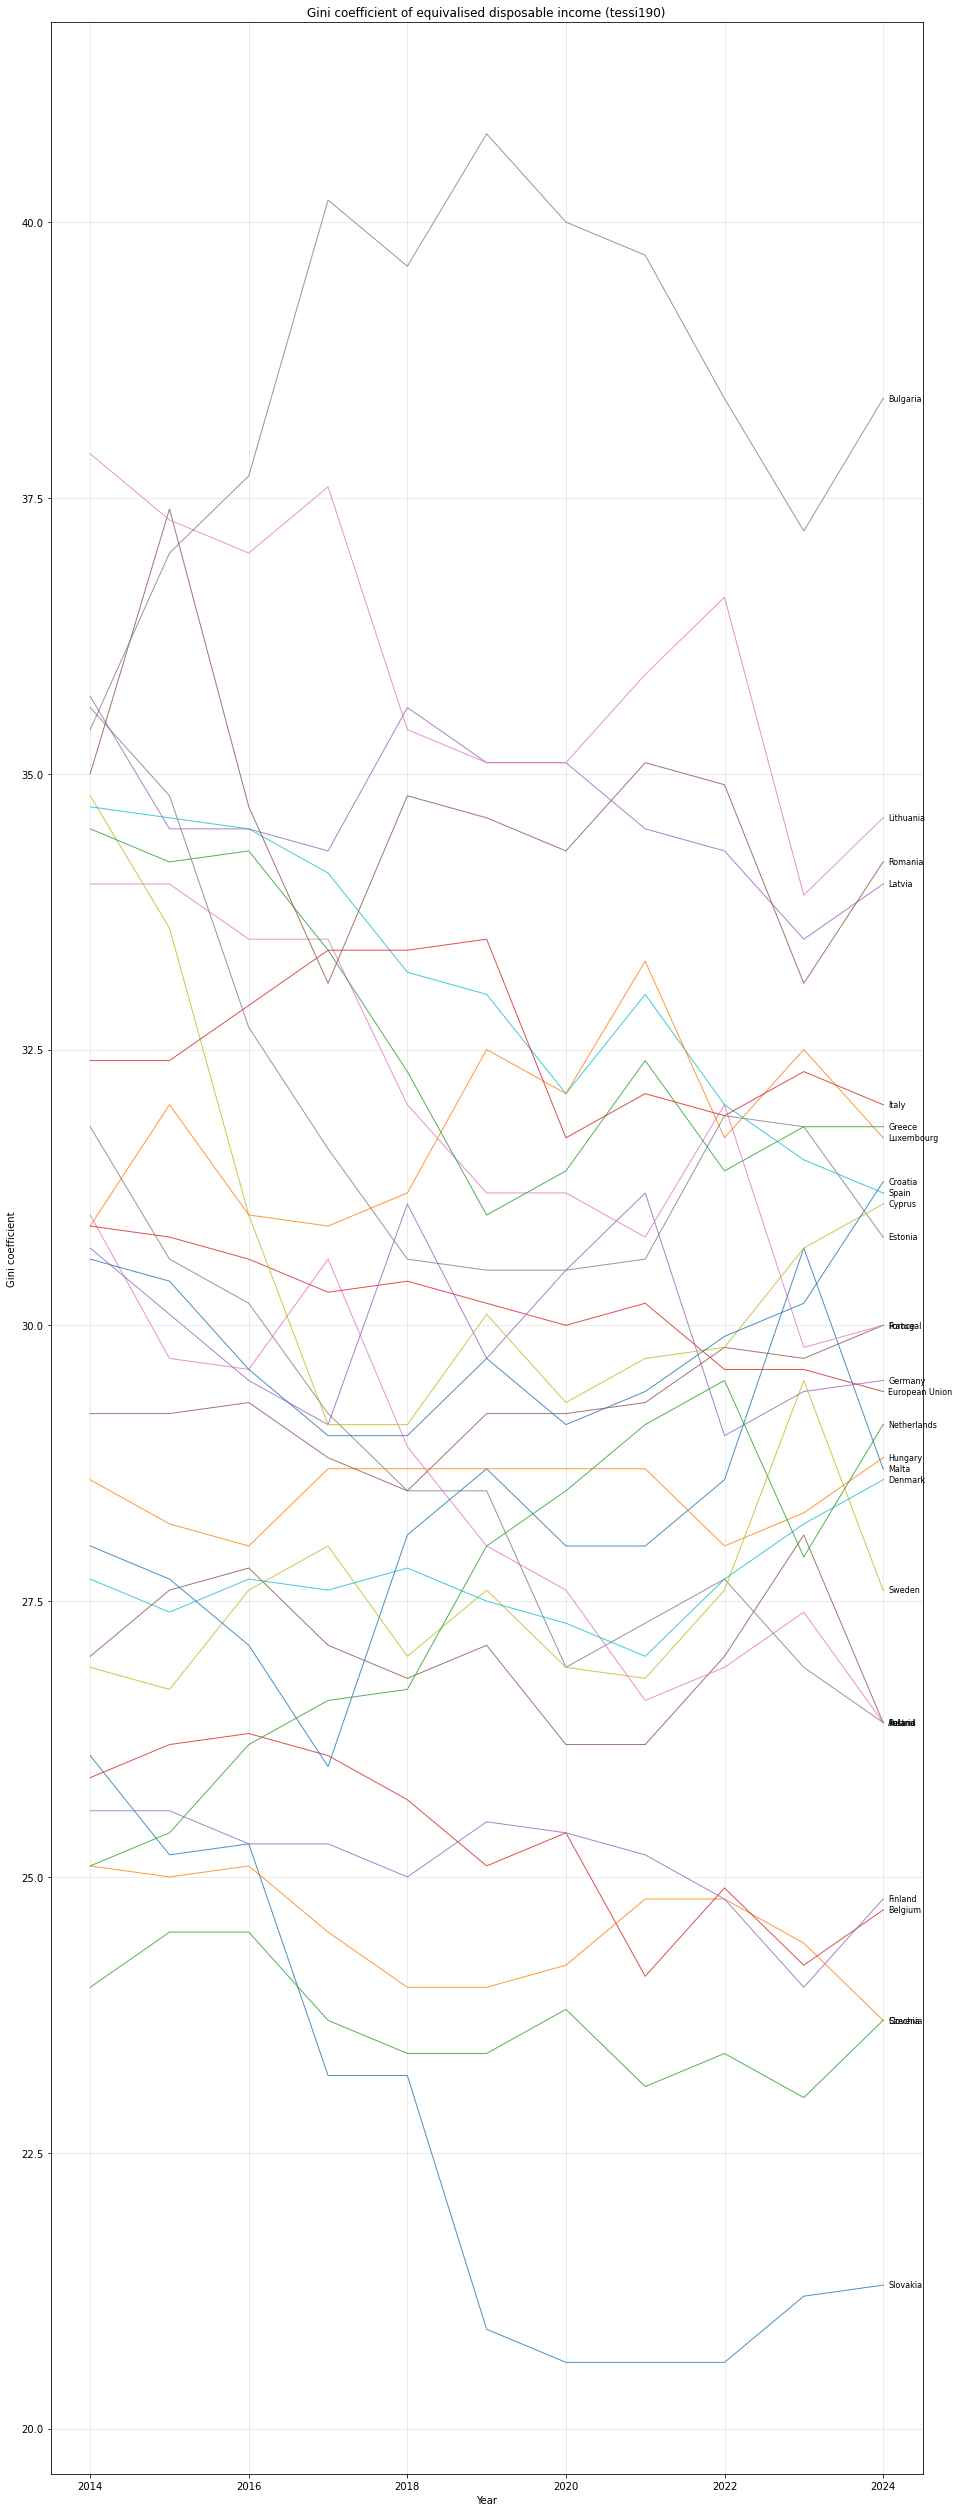

In [2]:
wide, long = build_dataframes(data)
plot_all(long, legend_outside=True)
plot_ranked_by_latest(long, include_eu_aggregate=True)
plot_ranked_with_end_labels(long, include_eu_aggregate=True)